# Table of Contents

## 0.1 Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans 
import pylab as pl


In [2]:
matplotlib.__version__

'3.5.2'

## 0.2 Import Data & Explore Original Dataframes

In [3]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 6 - Adv Analytics and Dashboard\Donate Life Project'

In [4]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'donors-census.pkl'))

#### Checking shape, column names, datatypes and overall 'look' of data

In [5]:
df.shape

(56000, 10)

The number of rows and columns matches what was exported from Excel.

In [6]:
df.head()

,population,year,state,age_group,gender,ethnicity,key,living_donors,deceased_donors,total_donors
0,96.0,2013,Alabama,< 1 Year,Male,American Indian/Alaska Native (Non-Hispanic),2013-Alabama-<1Year-Male-AmericanIndian/Alaska...,0.0,0.0,0.0
1,123.0,2014,Alabama,< 1 Year,Male,American Indian/Alaska Native (Non-Hispanic),2014-Alabama-<1Year-Male-AmericanIndian/Alaska...,0.0,0.0,0.0
2,78.0,2015,Alabama,< 1 Year,Male,American Indian/Alaska Native (Non-Hispanic),2015-Alabama-<1Year-Male-AmericanIndian/Alaska...,0.0,0.0,0.0
3,85.0,2016,Alabama,< 1 Year,Male,American Indian/Alaska Native (Non-Hispanic),2016-Alabama-<1Year-Male-AmericanIndian/Alaska...,0.0,0.0,0.0
4,95.0,2017,Alabama,< 1 Year,Male,American Indian/Alaska Native (Non-Hispanic),2017-Alabama-<1Year-Male-AmericanIndian/Alaska...,0.0,0.0,0.0


In [7]:
df.tail()

,population,year,state,age_group,gender,ethnicity,key,living_donors,deceased_donors,total_donors
55995,45781.0,2018,Wyoming,65+,Female,White (Non-Hispanic),2018-Wyoming-65+-Female-White(Non-Hispanic),1.0,1.0,2.0
55996,47316.0,2019,Wyoming,65+,Female,White (Non-Hispanic),2019-Wyoming-65+-Female-White(Non-Hispanic),0.0,0.0,0.0
55997,47690.0,2020,Wyoming,65+,Female,White (Non-Hispanic),2020-Wyoming-65+-Female-White(Non-Hispanic),0.0,0.0,0.0
55998,49349.0,2021,Wyoming,65+,Female,White (Non-Hispanic),2021-Wyoming-65+-Female-White(Non-Hispanic),0.0,0.0,0.0
55999,50885.0,2022,Wyoming,65+,Female,White (Non-Hispanic),2022-Wyoming-65+-Female-White(Non-Hispanic),0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 0 to 55999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   population       56000 non-null  float64 
 1   year             56000 non-null  int16   
 2   state            56000 non-null  category
 3   age_group        56000 non-null  category
 4   gender           56000 non-null  category
 5   ethnicity        56000 non-null  category
 6   key              56000 non-null  object  
 7   living_donors    56000 non-null  float64 
 8   deceased_donors  56000 non-null  float64 
 9   total_donors     56000 non-null  float64 
dtypes: category(4), float64(4), int16(1), object(1)
memory usage: 2.9+ MB


All of the column names and datatypes were extracted correctly.

In [9]:
df.describe()

,population,year,living_donors,deceased_donors,total_donors
count,5.600000e+04,56000.000000,56000.000000,56000.000000,56000.000000
mean,5.799690e+04,2017.500000,1.091036,1.936482,3.027518
std,1.632155e+05,2.872307,5.079285,7.377671,11.684521
min,0.000000e+00,2013.000000,0.000000,0.000000,0.000000
25%,9.290000e+02,2015.000000,0.000000,0.000000,0.000000
50%,5.414500e+03,2017.500000,0.000000,0.000000,0.000000
75%,3.242650e+04,2020.000000,0.000000,1.000000,1.000000
max,2.247291e+06,2022.000000,98.000000,139.000000,171.000000


All other basic statistics seem plausible/appropriate.

#### Checking for missing values & mixed data types

In [10]:
# Checking for nulls across the df
df.isnull().sum()

population         0
year               0
state              0
age_group          0
gender             0
ethnicity          0
key                0
living_donors      0
deceased_donors    0
total_donors       0
dtype: int64

No nulls found

In [11]:
# Check for mixed data types
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

No mixed data types found

In [12]:
dups = df.duplicated()
dups.shape

(56000,)

No duplicates found.

## 0.3 Wrangle data

###   0.3.1 Group data by year, state, gender


In [13]:
# Create a dataframe to hold the grouped data
df_group = pd.DataFrame()

In [14]:
# Sum up totals for each group
df_group = df.groupby(['state', 'year', 'gender']).sum()

# Reset the index to allow for data manipulation later
df_group = df_group.reset_index()

# Examine the data to see if it looks as expected
df_group.head()

,state,year,gender,population,living_donors,deceased_donors,total_donors
0,Alabama,2013,Female,2487659.0,65.0,46.0,111.0
1,Alabama,2013,Male,2342422.0,34.0,70.0,104.0
2,Alabama,2014,Female,2494707.0,75.0,47.0,122.0
3,Alabama,2014,Male,2347092.0,29.0,88.0,117.0
4,Alabama,2015,Female,2500713.0,54.0,57.0,111.0


In [15]:
df_group.shape

(1000, 7)

The shape and look of the data is as expected.

### 0.3.2 Adjust data types

In [16]:
# Examining current data types
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   state            1000 non-null   category
 1   year             1000 non-null   int64   
 2   gender           1000 non-null   category
 3   population       1000 non-null   float64 
 4   living_donors    1000 non-null   float64 
 5   deceased_donors  1000 non-null   float64 
 6   total_donors     1000 non-null   float64 
dtypes: category(2), float64(4), int64(1)
memory usage: 43.7 KB


In [17]:
# Adjusting datatypes to fit the data
df_group['population'] = df_group['population'].astype('int64')
df_group['living_donors'] = df_group['living_donors'].astype('int64')
df_group['deceased_donors'] = df_group['deceased_donors'].astype('int64')
df_group['year'] = df_group['year'].astype('int16')
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   state            1000 non-null   category
 1   year             1000 non-null   int16   
 2   gender           1000 non-null   category
 3   population       1000 non-null   int64   
 4   living_donors    1000 non-null   int64   
 5   deceased_donors  1000 non-null   int64   
 6   total_donors     1000 non-null   float64 
dtypes: category(2), float64(1), int16(1), int64(3)
memory usage: 37.8 KB


In [18]:
df_group.head()

,state,year,gender,population,living_donors,deceased_donors,total_donors
0,Alabama,2013,Female,2487659,65,46,111.0
1,Alabama,2013,Male,2342422,34,70,104.0
2,Alabama,2014,Female,2494707,75,47,122.0
3,Alabama,2014,Male,2347092,29,88,117.0
4,Alabama,2015,Female,2500713,54,57,111.0


### 0.3.3 Normalize data

In [19]:
# Create columns with data normalized as a rate of donation per million people.
df_group['living_per_mil'] = df_group['living_donors']/(df_group['population']/1000000)
df_group['deceased_per_mil'] = df_group['deceased_donors']/(df_group['population']/1000000)
df_group.head()

,state,year,gender,population,living_donors,deceased_donors,total_donors,living_per_mil,deceased_per_mil
0,Alabama,2013,Female,2487659,65,46,111.0,26.128983,18.491280
1,Alabama,2013,Male,2342422,34,70,104.0,14.514891,29.883599
2,Alabama,2014,Female,2494707,75,47,122.0,30.063651,18.839888
3,Alabama,2014,Male,2347092,29,88,117.0,12.355715,37.493204
4,Alabama,2015,Female,2500713,54,57,111.0,21.593841,22.793499


In [20]:
# Round new columns to the nearest tenth
df_group = df_group.round({'living_per_mil':1, 'deceased_per_mil':1})

In [21]:
df_group.head()

,state,year,gender,population,living_donors,deceased_donors,total_donors,living_per_mil,deceased_per_mil
0,Alabama,2013,Female,2487659,65,46,111.0,26.1,18.5
1,Alabama,2013,Male,2342422,34,70,104.0,14.5,29.9
2,Alabama,2014,Female,2494707,75,47,122.0,30.1,18.8
3,Alabama,2014,Male,2347092,29,88,117.0,12.4,37.5
4,Alabama,2015,Female,2500713,54,57,111.0,21.6,22.8


In [22]:
# Confirming the data in the new columns
df_group.value_counts('living_per_mil')

living_per_mil
11.2    12
18.4    10
10.1    10
15.5    10
16.9     9
        ..
29.1     1
27.8     1
27.5     1
27.4     1
49.6     1
Length: 322, dtype: int64

In [23]:
df_group.value_counts('deceased_per_mil')

deceased_per_mil
27.8     9
30.3     9
18.5     8
33.9     7
28.5     7
        ..
40.6     1
41.8     1
42.9     1
43.1     1
109.2    1
Length: 435, dtype: int64

### 0.3.4 Drop unneeded columns

In [24]:
# Drop unneeded column
df_group = df_group.drop(columns=['total_donors', 'living_donors', 'deceased_donors', 'population'])

In [25]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             1000 non-null   category
 1   year              1000 non-null   int16   
 2   gender            1000 non-null   category
 3   living_per_mil    1000 non-null   float64 
 4   deceased_per_mil  1000 non-null   float64 
dtypes: category(2), float64(2), int16(1)
memory usage: 22.2 KB


## 0.4 Explore data

### 0.4.1 Basic statistics

In [26]:
# Basic descriptive stats
df_group.describe()

,year,living_per_mil,deceased_per_mil
count,1000.000000,1000.00000,1000.000000
mean,2017.500000,18.64900,34.250100
std,2.873719,8.56381,14.725947
min,2013.000000,1.40000,4.800000
25%,2015.000000,11.90000,23.800000
50%,2017.500000,17.40000,31.500000
75%,2020.000000,24.20000,41.700000
max,2022.000000,49.60000,109.200000


Living donors have an (understandably) lower rate of donation than deceased. 

The range in rates for living donors is 48.2 and for deceased donors is 104.4

Both data sets appear to have a right skew (with deceased donors having more of a skew than living donors)

Using 1.5 * IQR for calculating the upper bound, that bound for living donors would be 42.7 and for deceased donors would be 68.55.

In [27]:
df_liv_outliers = df_group[df_group['living_per_mil']>42.7]
df_liv_outliers

,state,year,gender,living_per_mil,deceased_per_mil
374,Maine,2020,Female,46.4,15.9
572,New Hampshire,2019,Female,49.6,39.4
574,New Hampshire,2020,Female,43.5,13.0
576,New Hampshire,2021,Female,44.7,25.9
668,North Dakota,2017,Female,46.2,16.3
670,North Dakota,2018,Female,43.2,10.8
772,Rhode Island,2019,Female,46.0,9.2
812,South Dakota,2019,Female,48.0,34.3
816,South Dakota,2021,Female,47.7,27.3


After confirming that the data is plausible for those states/years, the outliers will remain in the data set.

In [28]:
df_dec_outliers = df_group[df_group['deceased_per_mil']>59.3]
df_dec_outliers

,state,year,gender,living_per_mil,deceased_per_mil
17,Alabama,2021,Male,10.2,60.7
19,Alabama,2022,Male,7.3,77.0
29,Alaska,2017,Male,10.4,62.1
32,Alaska,2019,Female,17.1,74.3
35,Alaska,2020,Male,10.4,59.6
79,Arkansas,2022,Male,2.7,66.4
141,Delaware,2013,Male,8.9,60.4
143,Delaware,2014,Male,19.9,62.0
145,Delaware,2015,Male,4.4,61.5
149,Delaware,2017,Male,15.1,77.8


In [29]:
df_dec_outliers.shape

(59, 5)

The outliers will remain in the data set.

### 0.4.2 Correlation Matrix Heatmap

In [30]:
# Create dataframe with only numerical data for heatmap purposes
df_n = df_group.drop(columns = ['state', 'year', 'gender'])

In [31]:
# Confirming the df_n is correct
df_n.shape

(1000, 2)

In [32]:
df_n.head()

,living_per_mil,deceased_per_mil
0,26.1,18.5
1,14.5,29.9
2,30.1,18.8
3,12.4,37.5
4,21.6,22.8


In [33]:
# Create a correlation matrix
df_n.corr()

,living_per_mil,deceased_per_mil
living_per_mil,1.000000,-0.448958
deceased_per_mil,-0.448958,1.000000


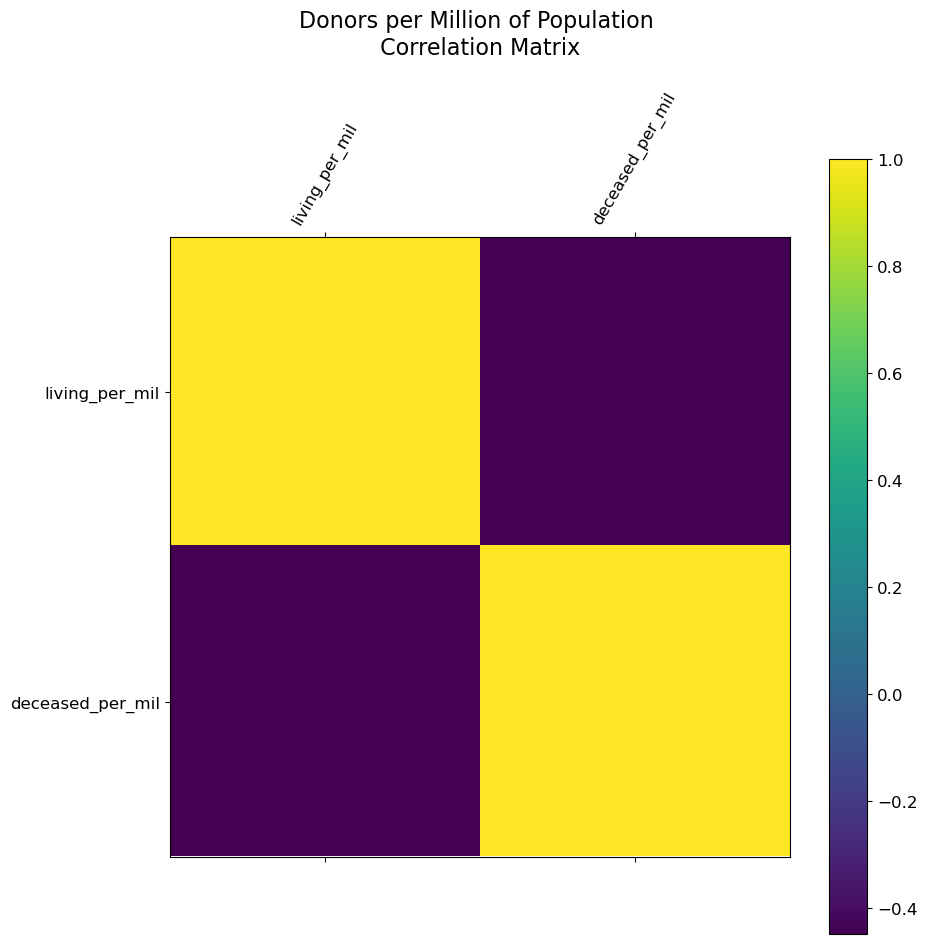

In [34]:
# Create a correlation heatmap using just matplotlib

# figure size 
f = plt.figure(figsize=(10, 10)) 

# map/chart type
plt.matshow(df_n.corr(), fignum=f.number)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.4)
plt.subplots_adjust(right=0.5)


# x axis labels
plt.xticks(range(df_n.shape[1]), df_n.columns, fontsize=12, rotation=60)

# y axis labels
plt.yticks(range(df_n.shape[1]), df_n.columns, fontsize=12)

# color legend/colorbar
cb = plt.colorbar()

# font/style
cb.ax.tick_params(labelsize=12)

# title
plt.title('Donors per Million of Population \n Correlation Matrix \n', fontsize=16)

plt.show()

In [35]:
# Exporting chart
f.figure.savefig(os.path.join(path, 'liv_v_dec_heatmap_mpl.png'))

Text(0.5, 1.0, 'Donors per Million of Population \n Correlation Matrix \n')

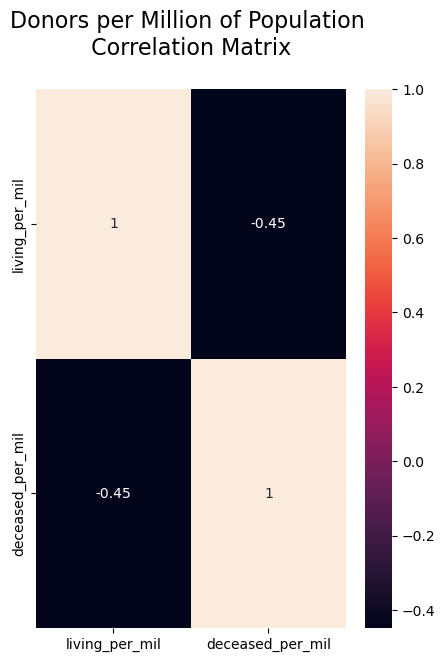

In [36]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,7))

# Create the correlation heatmap in seaborn by applying a heatmap 
# onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_n.corr(), annot = True, ax = ax) 

# title
plt.title('Donors per Million of Population \n Correlation Matrix \n', fontsize=16)

In [37]:
# Exporting chart
f.figure.savefig(os.path.join(path, 'liv_v_dec__heatmap_sns.png'))

In [38]:
# Reclaiming space
del f

#### Observations:

There is a moderate negative correlation (-0.45) between the number of living donors versus the number of deceased donors. 

### 0.4.3 Pair plot

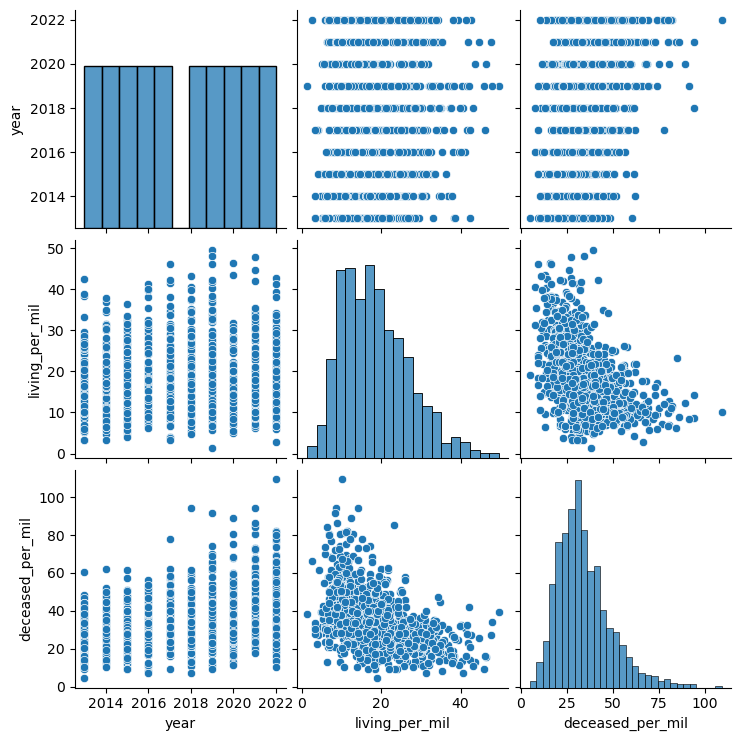

In [39]:
# Creating a pair plot of the quantitiatve variables in the data set

g2 = sns.pairplot(df_group, palette='Greys')


#### Observations:
As predicted in the descripitive statistics, both data sets have a right skew with the deceased donors having a longer tail of the two.

Additionally, it is clear that the outliers are not excessively far from the bulk of the data when seen visually.


In [40]:
# Reclaiming space
del g2

### 0.4.4 Scatterplots

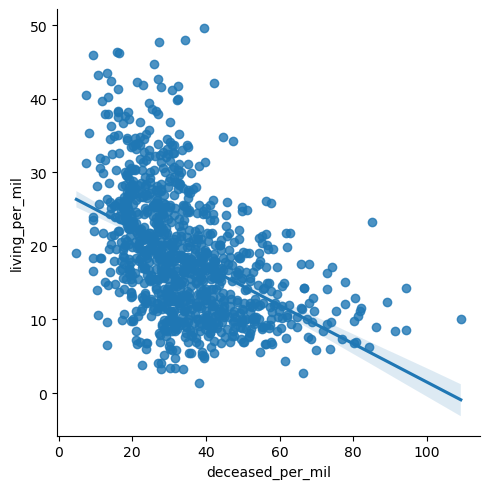

In [41]:
# Create scatterplots comparing the rates between donor types

sns.lmplot(x = 'deceased_per_mil', y = 'living_per_mil', data = df_group, palette='Grays')

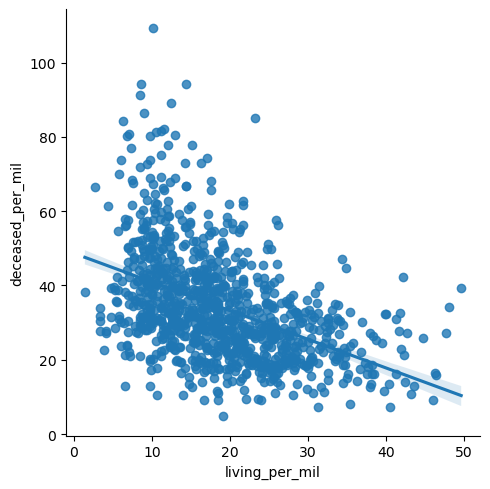

In [42]:
sns.lmplot(x = 'living_per_mil', y = 'deceased_per_mil', data = df_group)

#### Observations:

As the rate of one type of donor increases, it appears that the other type of donor decreases.  However, since the vast majority of points are a muddle in the middle, and the full relationship (if there is one) is unclear. 

###     0.4.4 Categorical Plot w/ Gender

The first set of plots will look at the rate of living donors by gender over time.  Each point represents the rate of donations for one year in one state by that gender. 

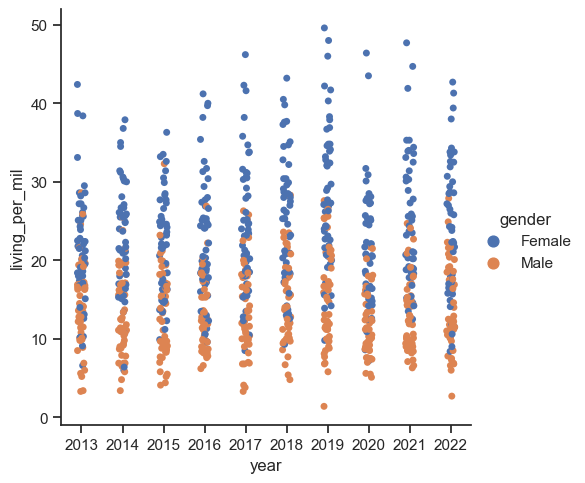

In [43]:
# Exploring the rate of living donors by gender over time
sns.set(style="ticks")
g = sns.catplot(x="year", y="living_per_mil", hue="gender", data=df_group)

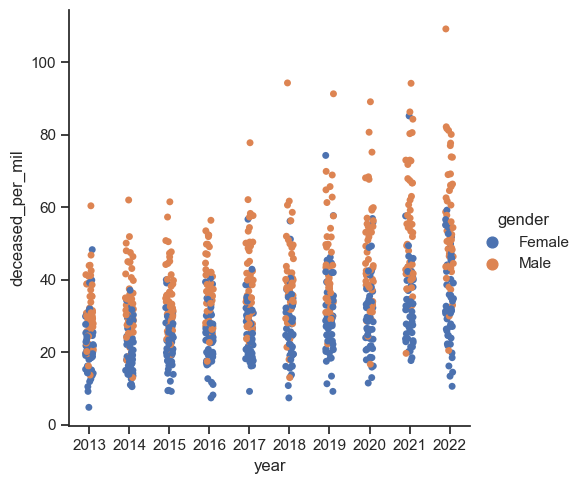

In [44]:
# Exploring the rate of deceased donors by gender over time
sns.set(style="ticks")
g = sns.catplot(x="year", y="deceased_per_mil", hue="gender", data=df_group)

This second set of plots will focus on the *total* number of each type of donor by gender over the years.  But first, I'll create smaller dfs to hold each of those sums.

In [45]:
# Reclaiming space
del g

In [46]:
# Subsetting living donor data and grouping it by year and gender. 
df_liv_sub = pd.DataFrame()
df_liv_sub = df.groupby(['year', 'gender'])['living_donors'].sum()

# Reset index to get columns names to show up correctly.
df_liv_sub = df_liv_sub.reset_index()

In [47]:
# Checking the subset
df_liv_sub

,year,gender,living_donors
0,2013,Female,3560.0
1,2013,Male,2253.0
2,2014,Female,3519.0
3,2014,Male,2087.0
4,2015,Female,3659.0
5,2015,Male,2109.0
6,2016,Female,3636.0
7,2016,Male,2137.0
8,2017,Female,3781.0
9,2017,Male,2220.0


In [48]:
df_liv_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           20 non-null     int64   
 1   gender         20 non-null     category
 2   living_donors  20 non-null     float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 592.0 bytes


In [49]:
# Confirming the correct data was pulled
df_liv_sub.shape

(20, 3)

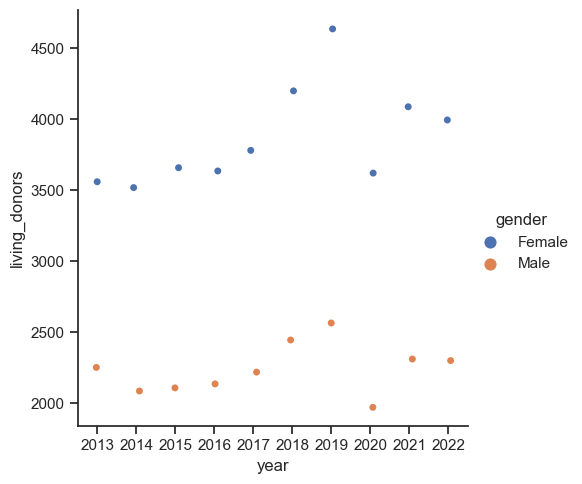

In [50]:
sns.set(style="ticks")
h = sns.catplot(x="year", y="living_donors", hue="gender", data=df_liv_sub)

#### Observations:
The plot of numbers of living donors shows
  * There are consistently, significantly more female than male living donors.
  * The number of donors generally increased from 2014-2019 for both genders.
  * In 2020, the number of living donors dramatically dropped, probably due to the pandemic and the cancellation of any surgeries that could be postponed.

In [51]:
# Subsetting deceased donor data and grouping it by year and gender. 
df_dec_sub = pd.DataFrame()
df_dec_sub = df.groupby(['year', 'gender'])['deceased_donors'].sum()

# Reset index to get columns names to show up correctly.
df_dec_sub = df_dec_sub.reset_index()
df_dec_sub

,year,gender,deceased_donors
0,2013,Female,3306.0
1,2013,Male,4814.0
2,2014,Female,3369.0
3,2014,Male,5070.0
4,2015,Female,3540.0
5,2015,Male,5380.0
6,2016,Female,3949.0
7,2016,Male,5876.0
8,2017,Female,4033.0
9,2017,Male,6096.0


In [52]:
df_dec_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             20 non-null     int64   
 1   gender           20 non-null     category
 2   deceased_donors  20 non-null     float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 592.0 bytes


In [53]:
# Confirming the correct data was pulled
df_dec_sub.shape

(20, 3)

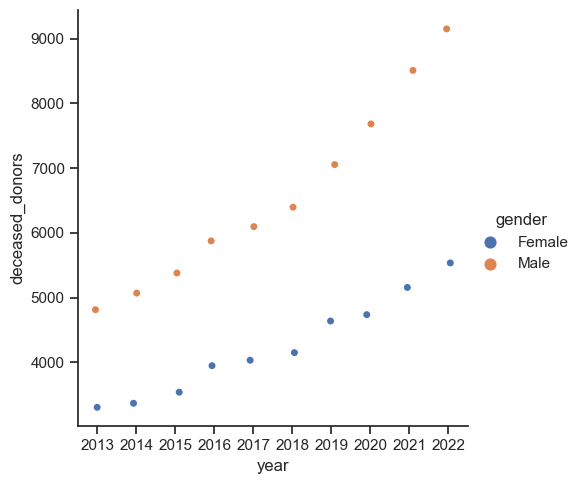

In [54]:
sns.set(style="ticks")
h = sns.catplot(x="year", y="deceased_donors", hue="gender", data=df_dec_sub)

#### Observations:
The plot of numbers of deceased donors shows
  * There are consistently, significantly more male than female deceased donors.
  * The number of donors has increased over time for both genders, althought the rate for males appears to be increasing slightly more steeply.
  * Deceased donor rates experienced little to no decline during the 2020 pandemic, unlike living donor rates. 

In [55]:
# Reclaiming space
del df_liv_sub
del df_dec_sub

## 0.5 Supervised Machine Learning

###    0.5.1 State hypothesis


Null hypothesis: There is no difference between the rates of donors per million 

###    0.5.2 Reshape variables into Numpy arrays

In [56]:
# Reshape population and total_donors into NumPy arrays
X = df_group['deceased_per_mil'].values.reshape(-1,1)
y = df_group['living_per_mil'].values.reshape(-1,1)

In [57]:
# Check X array
X

array([[ 18.5],
       [ 29.9],
       [ 18.8],
       [ 37.5],
       [ 22.8],
       [ 34. ],
       [ 27.9],
       [ 44.6],
       [ 26.6],
       [ 44.5],
       [ 34.9],
       [ 37.7],
       [ 32.8],
       [ 51.9],
       [ 36.8],
       [ 43.3],
       [ 43.6],
       [ 60.7],
       [ 44.1],
       [ 77. ],
       [ 19.9],
       [ 28.5],
       [ 22.8],
       [ 51.9],
       [ 19.9],
       [ 38.8],
       [ 25.5],
       [ 33.5],
       [ 22.6],
       [ 62.1],
       [ 51.2],
       [ 33.9],
       [ 74.3],
       [ 41.9],
       [ 28.8],
       [ 59.6],
       [ 57.6],
       [ 41.4],
       [ 25.9],
       [ 51.8],
       [ 18. ],
       [ 38.8],
       [ 18. ],
       [ 29.3],
       [ 20.1],
       [ 31.5],
       [ 27.2],
       [ 37.4],
       [ 30.8],
       [ 45.1],
       [ 25.6],
       [ 52. ],
       [ 35.2],
       [ 54.2],
       [ 34.6],
       [ 53.1],
       [ 31.7],
       [ 57. ],
       [ 35.9],
       [ 58.7],
       [ 21.2],
       [ 31.7],
       [

In [58]:
# Check y array
y

array([[26.1],
       [14.5],
       [30.1],
       [12.4],
       [21.6],
       [11.1],
       [19.5],
       [10.6],
       [21.9],
       [13.6],
       [24.6],
       [13.5],
       [23.7],
       [12.2],
       [17.8],
       [ 9.4],
       [14.7],
       [10.2],
       [16.1],
       [ 7.3],
       [19.9],
       [ 5.2],
       [31.4],
       [15.6],
       [28.5],
       [ 5.2],
       [11.3],
       [10.3],
       [17. ],
       [10.4],
       [14.2],
       [23.5],
       [17.1],
       [13.1],
       [ 8.6],
       [10.4],
       [25.9],
       [15.5],
       [11.5],
       [ 7.8],
       [20.1],
       [15.5],
       [24.8],
       [13.7],
       [23.3],
       [ 8.8],
       [18.6],
       [11.9],
       [19.8],
       [10.9],
       [25.3],
       [11.8],
       [27.3],
       [14.7],
       [17. ],
       [10.3],
       [15.2],
       [14.9],
       [18.2],
       [12.2],
       [ 6.6],
       [ 3.4],
       [ 6. ],
       [ 4.8],
       [ 9.9],
       [ 5.5],
       [10

###     0.5.3 Split data into training & test set

In [59]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

###     0.5.4 Run linear regression

In [60]:
# Create a regression object.

regression = LinearRegression()

In [61]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predict the values of y using X on the test set.

y_predicted = regression.predict(X_test)

###     0.5.5 Create plot of regression line on test set

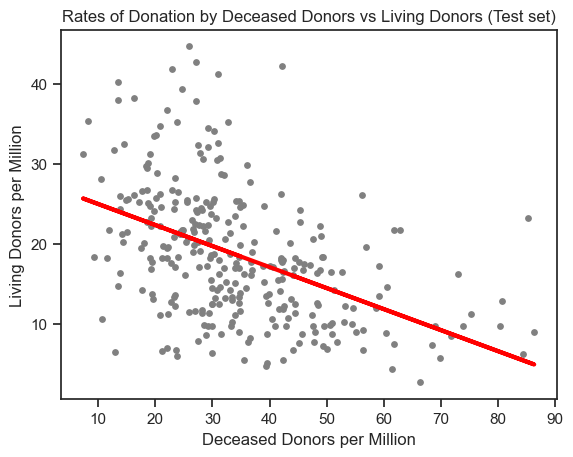

In [63]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rates of Donation by Deceased Donors vs Living Donors (Test set)')
plot_test.xlabel('Deceased Donors per Million')
plot_test.ylabel('Living Donors per Million')
plot_test.show()

###     0.5.6 Check model performance stats (MSE and R2 score)

In [64]:
# Create objects that contain the model summary statistics:
# mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.26287372]]
Mean squared error:  54.78936625814109
R2 score:  0.20858668879499054


###     0.5.7 Compare predicted y values with actual y values in df

In [65]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.8,16.042463
1,16.4,14.938394
2,30.7,19.380959
3,5.8,9.260321
4,40.3,24.112686
5,17.3,17.093958
6,10.3,18.828925
7,13.7,17.146533
8,19.9,18.460901
9,10.6,17.015096


###    0.5.8 Observations

This model appears to be a poor fit for this relationship.

The slope (-0.26) suggests a slight negative relationship between the rate of deceased donors and living donors -- meaning that as a population has more deceased donors, they have fewer living donors.  However, the R2 score shows that this line only explains 20% of the variation in the rates of living donors is explained by the rates of deceased donors.

Additionally the MSE of 54 indicates that this model is inadequate for explaining this relationship.  Since the standard deviation for the rate for living donors is only 8.5, this MSE is greater than three standard deviations -- that is just too big!

Looking at the differences between actual and predicted values of y confirms that there are some wildly inaccurate predicitons.  Just within the first 30 rows, there is a time predicted value is off by 17 donors, and over 30% of the time the difference is greater than 8.

The fact that this model does not work is somewhat reassuring because it would defy common sense to think of donation as a type of zero-sum game, where more of one type leads to fewer of the other.


In [66]:
# Reclaiming space
del X_train, X_test, y_train, y_test

In [67]:
del X, y, y_predicted, data, plot_test

## 0.6 Unsupervised Machine Learning

#### CLARIFICATION / CAVEAT
A scatterplot of this data does NOT show any sign of clusters or spherical data and the variables do not necessarily have the same variance.  As a result, in the real world, I would not use K-means algorithm on this data. However, since the assignment was to apply the K-means algorithm to my data set, I did so below. 

###     0.6.1 Standardize data

In [68]:
# Using the dataframe with only quantiative variables from before
# to creating a standardized version of the dataframe
# (data point - mean of column) / standard deviation of column
df_s = (df_n-df_n.mean())/df_n.std()

In [69]:
# Confirming the new standardized dataframe looks correct
df_s.shape

(1000, 2)

In [70]:
df_s.head()

,living_per_mil,deceased_per_mil
0,0.870057,-1.069548
1,-0.484481,-0.295404
2,1.337139,-1.049175
3,-0.729699,0.220692
4,0.344590,-0.777546


In [71]:
# Confirmting the means are all ~ 0 and the standard deviations = 1
df_s.describe()

,living_per_mil,deceased_per_mil
count,1.000000e+03,1.000000e+03
mean,-1.861233e-15,1.654010e-15
std,1.000000e+00,1.000000e+00
min,-2.014174e+00,-1.999878e+00
25%,-7.880838e-01,-7.096386e-01
50%,-1.458463e-01,-1.867520e-01
75%,6.481928e-01,5.059029e-01
max,3.614162e+00,5.089649e+00


###     0.6.3 Use elbow technique to choose # of clusters

In [72]:
# Define the range of clusters
num_cl = range(1, 10) 

# Define the k-means clusters in this range
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [73]:
# Creates a score to represent the rate of variation for the given cluster option.

score = [kmeans[i].fit(df_s).score(df_s) for i in range(len(kmeans))] 

score

C:\Users\CJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[-1998.0000000000007,
 -1060.3338216271582,
 -694.9308289951268,
 -545.2153783477879,
 -441.8508610727092,
 -367.5338576661727,
 -312.17253933306876,
 -277.6215986726434,
 -247.5337281643671]

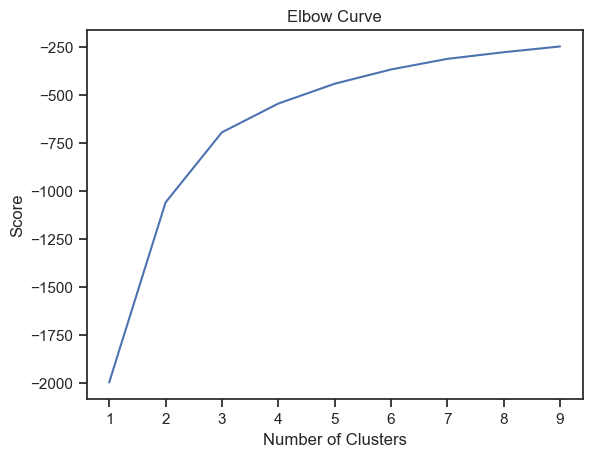

In [74]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve suggests that three clusters would be best for this data set.

###     0.6.4 Run K-means algorithm

In [75]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [76]:
# Fit the k-means object to the data.
kmeans.fit(df_s)

KMeans(n_clusters=3)

###     0.6.5 Add column with results from clusters

In [77]:
# Add a column with the cluster results
df_s['clusters'] = kmeans.fit_predict(df_s)

In [78]:
# Confirming column is added
df_s.head()

,living_per_mil,deceased_per_mil,clusters
0,0.870057,-1.069548,0
1,-0.484481,-0.295404,1
2,1.337139,-1.049175,0
3,-0.729699,0.220692,1
4,0.344590,-0.777546,0


In [79]:
# Checking to see how many records are in each cluster
df_s['clusters'].value_counts()

1    486
0    336
2    178
Name: clusters, dtype: int64

### 0.6.6 Make visualizations using clusters

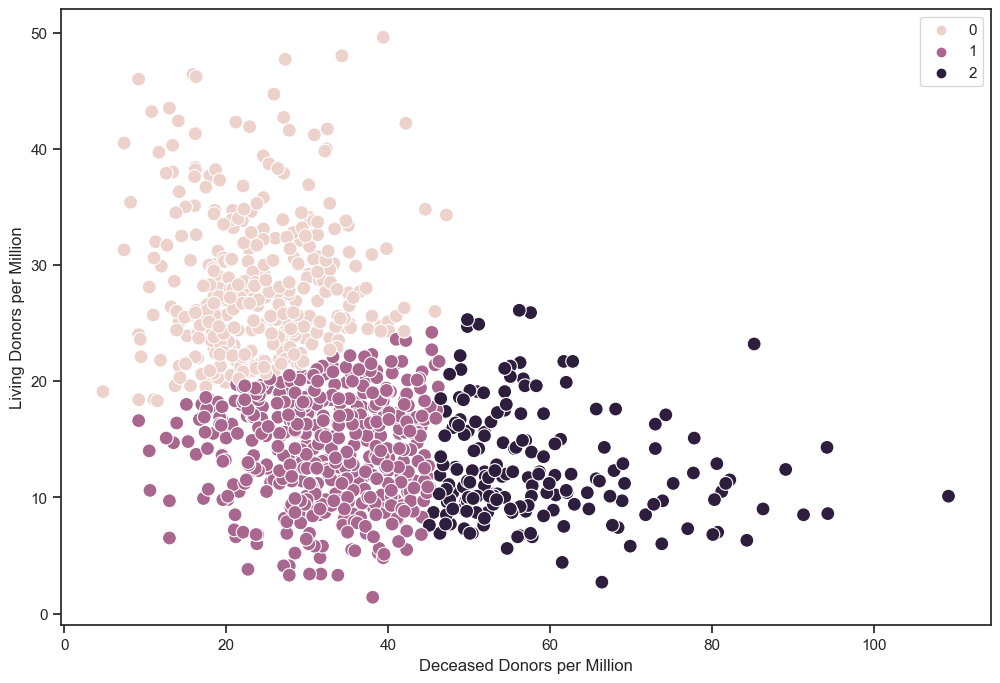

In [80]:
# Plot the clusters for the "Deceased Donors" and "Living Donors" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_group['deceased_per_mil'], 
                     y=df_group['living_per_mil'], 
                     hue=kmeans.labels_,   #generated by running k-means algorithm
                     s=100)                #size of points

ax.grid(False) # Removes background grid.
plt.xlabel('Deceased Donors per Million') 
plt.ylabel('Living Donors per Million') 
plt.show()

###     0.6.7 Calculate descriptive stats for clusters

In [81]:
# Rename clusters to make it easier to recognize on charts
df_s.loc[df_s['clusters'] == 2, 'cluster'] = 'dark purple'
df_s.loc[df_s['clusters'] == 1, 'cluster'] = 'purple'
df_s.loc[df_s['clusters'] == 0, 'cluster'] = 'pink'

In [82]:
# Bring the cluster identifiers over to the original df
df_group['cluster'] = df_s['cluster']

In [83]:
df_group.groupby('cluster').agg({ 'living_per_mil':['mean', 'median', 'min', 'max'],
                            'deceased_per_mil':['mean', 'median', 'min', 'max']})

living_per_mil                    deceased_per_mil               \
                      mean median   min   max             mean median   min   
cluster                                                                       
dark purple      12.664045  11.55   2.7  26.1        58.689326   55.2  45.1   
pink             28.241071  26.90  18.3  49.6        23.880357   23.3   4.8   
purple           14.209465  14.70   1.4  24.2        32.468313   32.5   9.2   

                    
               max  
cluster             
dark purple  109.2  
pink          47.2  
purple        46.3

###     0.6.8 Observations

The K-means algorithm identified three clusters:

0. pink (336 data points) - Where the rate of donation for living donors is higher than the average, but the rate for deceased donors is mostly average or below average.

1. purple (486 data points)  - The rates for donation of both living donors and deceased donors are roughly average or below average. 

2. dark purple (178 data points) - The rate of donation for deceased donors is higher than average, but the rate for living donors is mostly average or below average.

Possible next steps would be to see if these clusters correlate to specific states or time periods. 


# 0.7 Export dataframe with cluster designations

In [84]:
# Export a copy of the df as .csv that can be opened in Excel or Tableau for further exploration
df_group.to_csv(os.path.join(path, '02 Data','Prepared Data', 'states-years-cluster.csv'), index = False)